In [1]:
import sys
import cv2
import glob
sys.path.append('../../Python')
from matplotlib.image import imread
from keras.models import load_model
import os
from util import *
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Flatten,Input,MaxPool2D,Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# load model and emojis
model = load_model('Project_LeNet_V3_Epoch200.h5')

#emojiset
folder = 'hand_emo'
emojiset = []
for i in range(0,13):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            if(filename == str(str(i) + '.png')):
                emojiset.append(img)

emojiset = np.array(emojiset)
print(emojiset.shape)

#testset
testset = load_images_from_folder('test',[])
testset = np.array(testset)
print(testset.shape)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(13,)
(11, 50, 50, 3)


In [ ]:
# set video capture 
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FPS, 144)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1200)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1200)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    kernel = np.ones((3,3),np.uint8)
    cv2.rectangle(frame,(700,300),(1050,650),(0,255,0),3)
    
    # Our operations on the frame come here
    frame_capture = frame
    # Image Processing
    image_capture = frame_capture[300:650,700:1050]
    hsv = cv2.cvtColor(image_capture, cv2.COLOR_BGR2HSV)
    lower_skin = np.array([0,15,70], dtype=np.uint8)
    upper_skin = np.array([20,150,255], dtype=np.uint8)
    mask = cv2.inRange(hsv, lower_skin, upper_skin)
    mask = cv2.erode(mask,kernel,iterations = 2)
    mask = cv2.dilate(mask,kernel,iterations = 7)
    mask = cv2.GaussianBlur(mask,(3,3),100)

    #testing
    i = np.random.randint(0,11)
    image = testset[i]
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    # Model Predict
    # keras_predict has inner procedure that reshape the size of image to 50*50, which is the appropriate size of a single
    # input to the model (1,50,50,1)
    pred_probab, pred_class = keras_predict(model, mask)
    print('Class Probability: ',pred_probab)
    print('Predicted Class: ',pred_class)
    if(pred_probab >= 0.97):
        # Display matching emoji
        test_image = imagereturnshrink(emojiset,pred_class,10)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2BGRA)
        frame_h,frame_w,frame_c = frame.shape
        overlay = np.zeros((frame_h,frame_w,4),dtype='uint8')
        emoji_h,emoji_w,emoji_c = test_image.shape
        for i in range(0,emoji_h):
            for j in range(0,emoji_w):
                if(test_image[i,j][2] != 255 and test_image[i,j][1] != 255 and test_image[i,j][0] != 255):
                    overlay[420 + i,270 + j] = test_image[i,j]
                
        cv2.addWeighted(overlay,0.5,frame,1.0,0,frame)
    # Display the resulting frame
    cv2.imshow('mask',mask)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

Class Probability:  0.5420518
Predicted Class:  9
Class Probability:  0.9981705
Predicted Class:  2
Class Probability:  0.9713696
Predicted Class:  1
Class Probability:  0.95584375
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  0.9999999
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  0.9999999
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class

Class Probability:  1.0
Predicted Class:  4
Class Probability:  1.0
Predicted Class:  7
Class Probability:  0.9999993
Predicted Class:  5
Class Probability:  1.0
Predicted Class:  5
Class Probability:  1.0
Predicted Class:  4
Class Probability:  1.0
Predicted Class:  4
Class Probability:  1.0
Predicted Class:  4
Class Probability:  0.99999344
Predicted Class:  4
Class Probability:  1.0
Predicted Class:  4
Class Probability:  1.0
Predicted Class:  4
Class Probability:  0.99482983
Predicted Class:  5
Class Probability:  0.99999964
Predicted Class:  4
Class Probability:  0.99999774
Predicted Class:  4
Class Probability:  1.0
Predicted Class:  4
Class Probability:  0.98901504
Predicted Class:  5
Class Probability:  0.9693998
Predicted Class:  5
Class Probability:  0.9999988
Predicted Class:  4
Class Probability:  0.9999993
Predicted Class:  4
Class Probability:  1.0
Predicted Class:  4
Class Probability:  0.9464008
Predicted Class:  4
Class Probability:  0.99997807
Predicted Class:  4
Clas

Class Probability:  0.9999993
Predicted Class:  11
Class Probability:  0.93213975
Predicted Class:  4
Class Probability:  1.0
Predicted Class:  6
Class Probability:  1.0
Predicted Class:  9
Class Probability:  1.0
Predicted Class:  3
Class Probability:  0.87291497
Predicted Class:  7
Class Probability:  1.0
Predicted Class:  6
Class Probability:  1.0
Predicted Class:  6
Class Probability:  0.9998847
Predicted Class:  6
Class Probability:  0.9999974
Predicted Class:  11
Class Probability:  0.9958604
Predicted Class:  5
Class Probability:  1.0
Predicted Class:  11
Class Probability:  1.0
Predicted Class:  6
Class Probability:  1.0
Predicted Class:  6
Class Probability:  0.99876416
Predicted Class:  11
Class Probability:  0.99996567
Predicted Class:  6
Class Probability:  0.9999999
Predicted Class:  6
Class Probability:  0.9947915
Predicted Class:  9
Class Probability:  0.9994567
Predicted Class:  6
Class Probability:  1.0
Predicted Class:  11
Class Probability:  0.9970886
Predicted Class

Class Probability:  1.0
Predicted Class:  8
Class Probability:  0.99993837
Predicted Class:  9
Class Probability:  0.9999869
Predicted Class:  7
Class Probability:  1.0
Predicted Class:  6
Class Probability:  0.88799345
Predicted Class:  9
Class Probability:  1.0
Predicted Class:  7
Class Probability:  0.9987639
Predicted Class:  11
Class Probability:  0.99919075
Predicted Class:  5
Class Probability:  0.61349934
Predicted Class:  4
Class Probability:  0.9999956
Predicted Class:  4
Class Probability:  0.7414528
Predicted Class:  9
Class Probability:  0.9955485
Predicted Class:  6
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  1.0
Predicted Class:  1
Class Probability:  0.9999999
Predicted Class:  7
Class Probability:  0.72794634
Predicted Class:  2
Class Probability:  0.9998932
Predicted Class:  5
Class Probability:  0.9887904
Predicted Class:  3
Class Probability:  0.99980456
Predicted Class:  4
Class Probability:  1.0
Predi

In [ ]:
plt.imshow(test_image)

In [ ]:
image = imread('gestures/5/1190.jpg')
pred_probab, pred_class = keras_predict(model, image)
print(image.shape)
print(pred_class, pred_probab)

In [ ]:
emojiset.shape

In [ ]:
emojiset = np.array(emojiset)
emojiset.shape

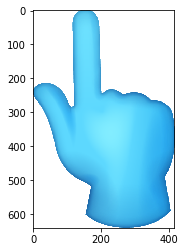

In [8]:
plt.imshow(emojiset[11])